# IGRA


Download data from the **Integrated Global Radiosonde Archive (IGRA)**: https://www.ncdc.noaa.gov/data-access/weather-balloon/integrated-global-radiosonde-archive

In [1]:
from pansat.products.stations import igra

## Per station 

For the download for a specific station, select the station name or look for the closest station to a location[lat,lon]. 



In [2]:
# create product instance for station location (finds closest station to [lat,lon])
radiosounding = igra.IGRASoundings(location=[35,105])

In [5]:
# have a look at the meta data from the station 
stations= radiosounding.get_metadata(station= True)
stations

,ID,lat,lon,elevation [m],name,start year,end year,# soundings in record
553,CHM00057006,34.583,105.75,1143.0,TIANSHUI,1973,1987,6899


In [11]:
# download all data for station by name 
radiosounding = igra.IGRASoundings('ABU DHABI INTERNATIONAL AIRPOR')
file = radiosounding.download()

## Per variable (monthly, all stations)

To download data from all stations, choose a variable to download. This data will come as 
monthly means in two separate files for day and night (00:00 UTC and 12:00 UTC). 

In [2]:
radiosounding = igra.IGRASoundings(variable = 'temp')

Please enter your pansat user password:
········


In [3]:
# download only recent month
files = radiosounding.download('recent')

## Open and plot data 

In [4]:
# get data as pandas dataframe 
data00= radiosounding.open(files[0])
data12= radiosounding.open(files[1])

data00

,Station,Year,Month,Level [hPa],"Value [$^\circ$C/10, m s$^{-1}$ or Pa]",Num
0,AEM00041217,2020,12,1000,212,31
1,AEM00041217,2020,12,925,164,31
2,AEM00041217,2020,12,850,130,31
3,AEM00041217,2020,12,700,54,31
4,AEM00041217,2020,12,500,-101,31
...,...,...,...,...,...,...
9236,VMM00048900,2020,12,70,-741,29
9237,VMM00048900,2020,12,50,-667,29
9238,VMM00048900,2020,12,30,-603,29
9239,VMM00048900,2020,12,20,-537,29


In [9]:
# choose a random station 
station = data00.Station.values[999]
temp00 = data00[data00.Station == station]
temp12 = data12[data12.Station == station]

# get station name 
station_name= radiosounding.locations[radiosounding.locations.ID == station].name.values[0]

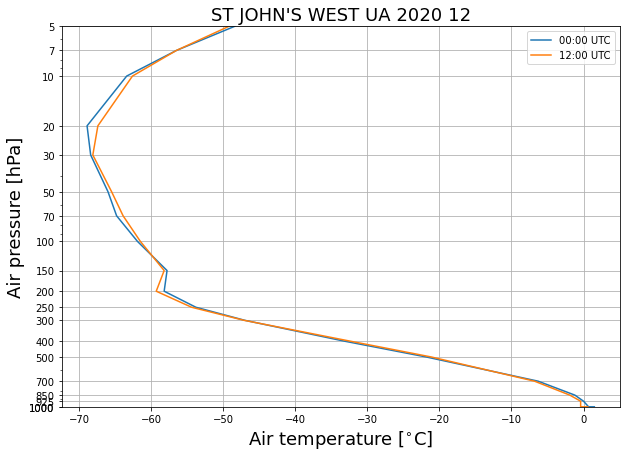

In [10]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,7))
# plot temperature at specific station during two times a day
pressure= temp00.iloc[:,3].values
# set surface pressure to 1000 hPa 
pressure[pressure == 9999]= 1000

plt.plot(temp00.iloc[:,4].values/10,pressure, label = '00:00 UTC')
plt.plot(temp12.iloc[:,4].values/10,pressure, label ='12:00 UTC')
plt.legend()

plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks(temp00.iloc[:,3], temp00.iloc[:,3])
plt.ylim(pressure.max(), pressure.min())
plt.grid()

# labels 
fs= 18
plt.title(station_name + ' '+ str(temp00.Year.values[0]) + ' '+str(temp00.Month.values[0]),fontsize= fs) 
plt.xlabel('Air temperature [$^{\circ}$C]', fontsize= fs)
plt.ylabel('Air pressure [hPa]', fontsize= fs)
plt.show()